In [19]:
import sys

sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from classes import CancerStates

In [38]:
# Define hyperparameters
Xdim = 1
Ydim = 1
Tdim = 1

h = 0.005
k = 0.001

nx = int(round(Xdim / h) + 1)
ny = int(round(Ydim / h) + 1)
nt = int(round(Tdim / k) + 1)

dn = 0.001
dm = 0.001
l_gamma = 0.005
l_eta = 10
l_alpha = 0.1
l_beta = 0
l_epsilon = 0.0025

In [35]:
def distance_from_circle_center(x: np.ndarray, y: np.ndarray, center_x: float, center_y: float):
  return np.sqrt( (x - center_x)**2 + (y - center_y)**2 )

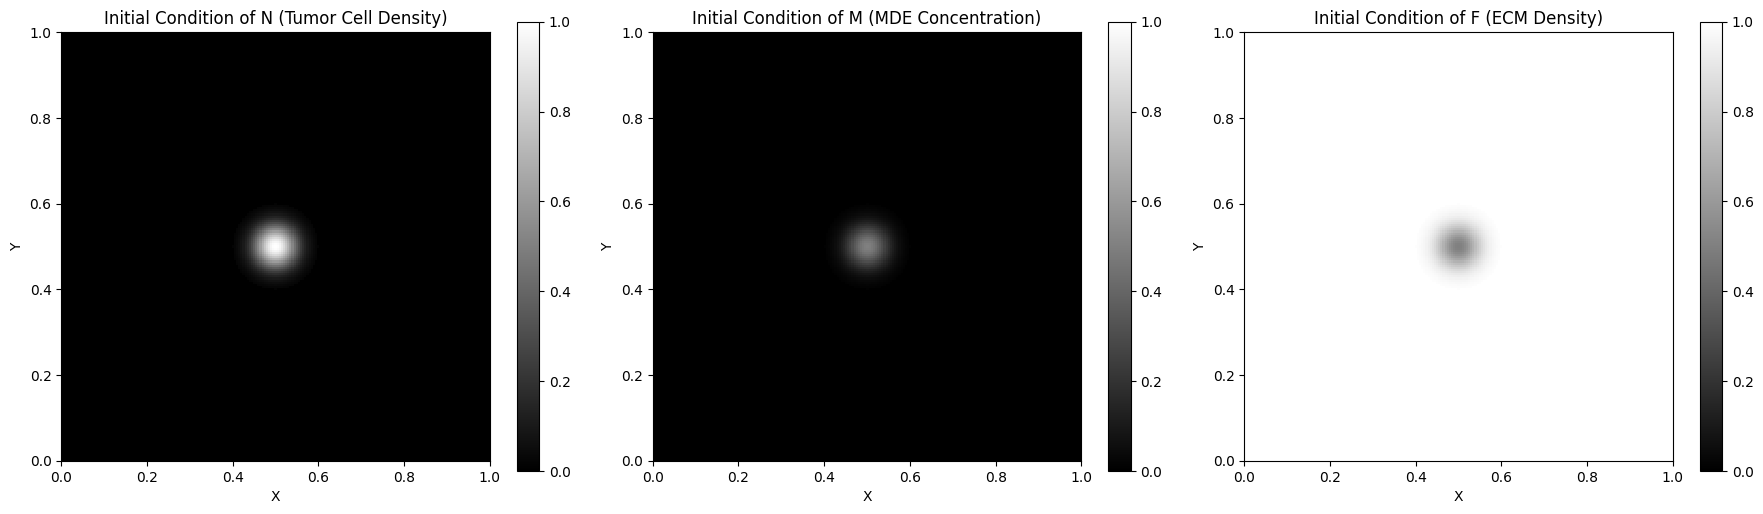

In [ ]:
"""
Plot initial tumor cell density, ECM density, MDE concentration

Intial values are already discrete from Xgrid and Ygrid
"""

xspace = np.linspace(0, Xdim, nx)
yspace = np.linspace(0, Ydim, ny)
Xgrid, Ygrid = np.meshgrid(xspace, yspace)

# Define center and max distance for circular piecewise mask
center_x = Xdim / 2
center_y = Ydim / 2
max_dist_from_center = 0.1 * min(Xdim, Ydim)

# Apply circular piecewise mask
initN = np.zeros_like(Xgrid)
piecewise_mask = distance_from_circle_center(Xgrid, Ygrid, center_x, center_y) <= max_dist_from_center
initN[piecewise_mask] = np.exp(- ( distance_from_circle_center(Xgrid[piecewise_mask], Ygrid[piecewise_mask], center_x, center_y)**2 ) / 0.0025)
initM = 0.5 * initN
initF = 1 - 0.5 * initN

# Plot initN, initM, initF
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ["Initial Condition of N (Tumor Cell Density)",
          "Initial Condition of M (MDE Concentration)",
          "Initial Condition of F (ECM Density)"]
data = [initN, initM, initF]

for i in range(3):
  im = axes[i].imshow(data[i], extent=[0, Xdim, 0, Ydim], origin='lower', cmap='gray', interpolation='nearest', vmin=0, vmax=1)
  axes[i].set_title(titles[i])
  axes[i].set_xlabel("X")
  axes[i].set_ylabel("Y")
  fig.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

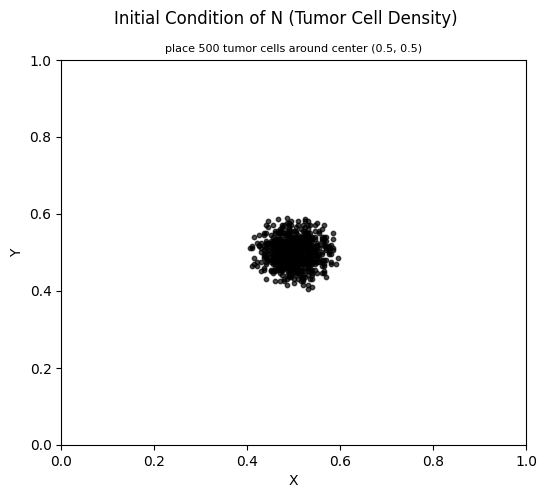

In [ ]:
"""
Plot initial tumor cell density(discrete) using probabilistic sampling

Uses above initN as probability density function to sample tumor cell locations
"""

xspace = np.linspace(0, Xdim, nx)
yspace = np.linspace(0, Ydim, ny)
Xgrid, Ygrid = np.meshgrid(xspace, yspace)

# Define center and max distance for circular piecewise mask
center_x = Xdim / 2
center_y = Ydim / 2
max_dist_from_center = 0.1 * min(Xdim, Ydim)

# Normalize initN as probabilities
N_probabilities = initN / np.sum(initN) # Sum(N_probabilities) = 1

x_flat = Xgrid.flatten()
y_flat = Ygrid.flatten()
prob_flat = N_probabilities.flatten()

# Choose num_tumor_cells distinct locations
num_tumor_cells = 500
chosen_indices = np.random.choice(len(x_flat), size=num_tumor_cells, replace=False, p=prob_flat)

x_samples = x_flat[chosen_indices]
y_samples = y_flat[chosen_indices]

plt.figure(figsize=(6, 5))
plt.scatter(x_samples, y_samples, color='black', s=10, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.suptitle("Initial Condition of N (Tumor Cell Density)", y=0.98, fontsize=12)
plt.title(f"place {num_tumor_cells} tumor cells around center {center_x, center_y}", fontsize=8)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
